In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Telco_df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
Telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Initializing the target variable to avoid tempering with it

In [4]:
y = Telco_df['Churn']

In [5]:
y.isnull().sum()

0

In [6]:
Telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
Telco_df.shape

(7043, 21)

In [8]:
Telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
Telco_df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [10]:
Telco_df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


dropping the values with the highest cardinality in terms of the most number of unique items

In [11]:
Telco_df_copy = Telco_df.drop(['Churn', 'customerID', 'TotalCharges'], axis = 1).copy()

In [12]:
Telco_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


Categorical features and the Numerical Features.

In [13]:
cat_features = Telco_df_copy.select_dtypes(include = 'object').columns
num_features = Telco_df_copy.select_dtypes(exclude = 'object').columns

In [14]:
cat_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [15]:
num_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

Correlation Matrix

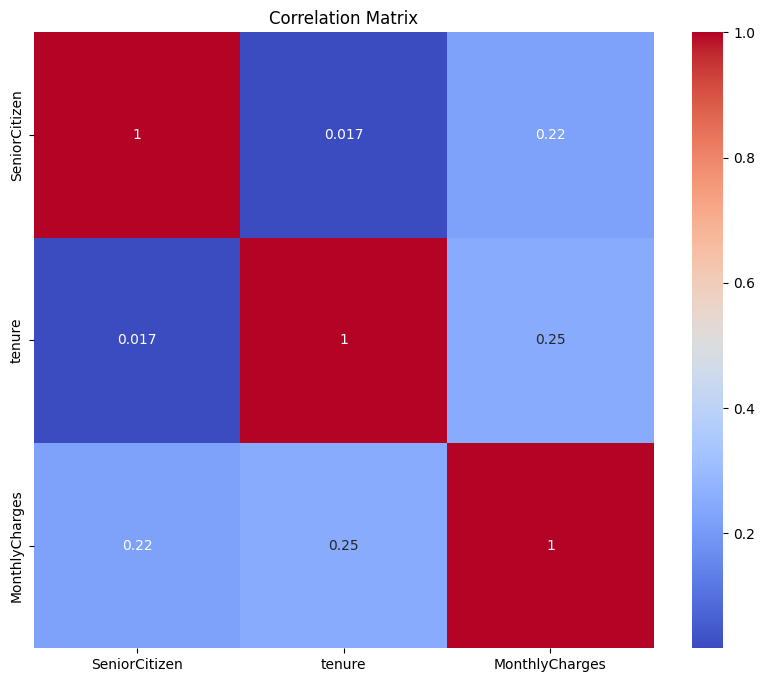

In [16]:
correlation_matrix = Telco_df.corr(numeric_only = True)
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [17]:
Telco_df_copy['PaperlessAndElectronicPayment'] = (Telco_df_copy['PaperlessBilling'] == 'Yes') & (Telco_df_copy['PaymentMethod'].isin(['Electronic check', 'Mailed check']))
Telco_df_copy['TechSupportUser'] = (Telco_df_copy['TechSupport'] == 'Yes').astype(int)
Telco_df_copy['StreamingEngagement'] = (Telco_df_copy['StreamingTV'] == 'Yes').astype(int) + (Telco_df_copy['StreamingMovies'] == 'Yes').astype(int)
Telco_df_copy['HasMultipleLinesAndStreaming'] = (Telco_df_copy['MultipleLines'] == 'Yes') & ((Telco_df_copy['StreamingTV'] == 'Yes') | (Telco_df_copy['StreamingMovies'] == 'Yes'))
Telco_df_copy['HasOnlineSecurityAndBackup'] = (Telco_df_copy['OnlineSecurity'] == 'Yes') & (Telco_df_copy['OnlineBackup'] == 'Yes')

In [19]:
#Encoding the categorical variables.
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Check unique values count for each categorical column
for col in cat_features:
    print(f"{col}: {Telco_df_copy[col].nunique()} unique values")

#Drop or encode differently high cardinality columns
high_cardinality_cols = [col for col in cat_features if Telco_df_copy[col].nunique() > 15] # Define a threshold
cat_cols = [col for col in cat_features if col not in high_cardinality_cols]

gender: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 4 unique values


In [20]:
#one hot encoding on the remaining columns
Telco_df_enc = pd.get_dummies(Telco_df_copy, columns = cat_features)
Telco_df_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,PaperlessAndElectronicPayment,TechSupportUser,StreamingEngagement,HasMultipleLinesAndStreaming,HasOnlineSecurityAndBackup,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,True,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,False,0,0,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,True,0,0,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,False,1,0,False,False,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,True,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Telco_df_enc[num_features] = scaler.fit_transform(Telco_df_enc[num_features])
Telco_df_enc.head()

,SeniorCitizen,tenure,MonthlyCharges,PaperlessAndElectronicPayment,TechSupportUser,StreamingEngagement,HasMultipleLinesAndStreaming,HasOnlineSecurityAndBackup,gender_Female,gender_Male,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,True,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0.0,0.472222,0.385075,False,0,0,False,False,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0.0,0.027778,0.354229,True,0,0,False,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0.0,0.625000,0.239303,False,1,0,False,False,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0.0,0.027778,0.521891,True,0,0,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


Splitting into Training and Testing sets

In [22]:
from sklearn.model_selection import train_test_split

X = Telco_df_enc

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

In [23]:
#label encoding the target variable
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.fit_transform(y_test)

In [25]:
print(Telco_df_enc.dtypes)

SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
PaperlessAndElectronicPayment                 bool
TechSupportUser                              int64
StreamingEngagement                          int64
HasMultipleLinesAndStreaming                  bool
HasOnlineSecurityAndBackup                    bool
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL            

In [26]:
#customer segementation using K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(Telco_df_enc)

#adding the cluster labels to the dataset
Telco_df_copy['clusters'] = kmeans.labels_
#Adding a new column to the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
print(X_train.dtypes)

SeniorCitizen                              float64
tenure                                     float64
MonthlyCharges                             float64
PaperlessAndElectronicPayment                 bool
TechSupportUser                              int64
StreamingEngagement                          int64
HasMultipleLinesAndStreaming                  bool
HasOnlineSecurityAndBackup                    bool
gender_Female                                 bool
gender_Male                                   bool
Partner_No                                    bool
Partner_Yes                                   bool
Dependents_No                                 bool
Dependents_Yes                                bool
PhoneService_No                               bool
PhoneService_Yes                              bool
MultipleLines_No                              bool
MultipleLines_No phone service                bool
MultipleLines_Yes                             bool
InternetService_DSL            

In [29]:
Telco_df_enc = pd.DataFrame(Telco_df_enc)

Converting the boolean values in the encoded dataset into integers ready for modelling

In [30]:
bool_cols = Telco_df_enc.select_dtypes(include = 'bool').columns
Telco_df_enc[bool_cols] = Telco_df_enc[bool_cols].astype(int)

LINEAR REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state = 42)
logistic_model.fit(X_train, y_train_enc)


LogisticRegression(max_iter=1000, random_state=42)

In [32]:
y_pred = logistic_model.predict(X_test)

In [33]:
predictions_df = pd.DataFrame({'Predicted': y_pred})
predictions_df.head()

,Predicted
0,1
1,0
2,0
3,1
4,0


In [34]:
predictions_df.to_csv('Telco Encoded Predictions.csv', index = False)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
accuracy = accuracy_score(y_test_enc, y_pred)
precision = precision_score(y_test_enc, y_pred, pos_label=1)
recall = recall_score(y_test_enc, y_pred, pos_label=1)
f1 = f1_score(y_test_enc, y_pred, pos_label=1)
confusion = confusion_matrix(y_test_enc, y_pred)

In [37]:
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1: {f1:.4f}")
print(f"confusion matrix: \n{confusion}")

accuracy: 0.8112
precision: 0.6858
recall: 0.5627
f1: 0.6182
confusion matrix: 
[[1391  148]
 [ 251  323]]


Text(0.5, 1.0, 'CONFUSION MATRIX')

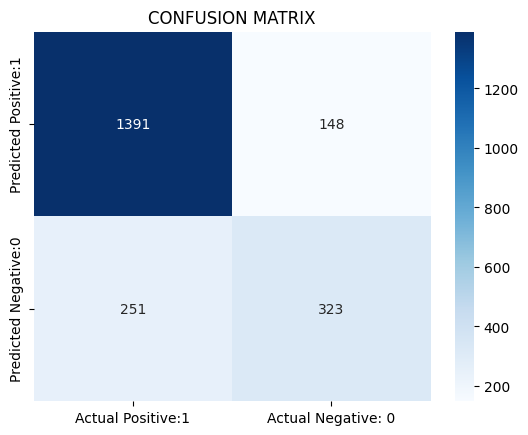

In [40]:
#confusion matrix based on the model's prediction
conf_matrix= pd.DataFrame(data = confusion, columns = ['Actual Positive:1', 'Actual Negative: 0'], index = ['Predicted Positive:1', 'Predicted Negative:0'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('CONFUSION MATRIX')


In [41]:
#using SHAP to interprete the models
%pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 9.8 MB/s eta 0:00:00


In [42]:
Telco_df_enc.dtypes

,0
SeniorCitizen,float64
tenure,float64
MonthlyCharges,float64
PaperlessAndElectronicPayment,int64
TechSupportUser,int64
StreamingEngagement,int64
HasMultipleLinesAndStreaming,int64
HasOnlineSecurityAndBackup,int64
gender_Female,int64
gender_Male,int64


In [43]:
#calculating the shap values
import shap
explainer = shap.Explainer(logistic_model, Telco_df_enc)
shap_values = explainer(Telco_df_enc)

In [44]:
shap_values_array = np.array(shap_values.values)
shap_values_array

array([[-0.03148815,  0.98811481,  0.06545731, ...,  0.0160016 ,
         0.1216862 ,  0.02404723],
       [-0.03148815, -0.04345079,  0.00814529, ...,  0.0160016 ,
        -0.06552334, -0.10251712],
       [-0.03148815,  0.95685524,  0.01470127, ...,  0.0160016 ,
        -0.06552334, -0.10251712],
       ...,
       [-0.03148815,  0.67551917,  0.06598602, ...,  0.0160016 ,
         0.1216862 ,  0.02404723],
       [ 0.16531281,  0.89433612, -0.02875858, ...,  0.0160016 ,
        -0.06552334, -0.10251712],
       [-0.03148815, -1.04375683, -0.09484717, ...,  0.0160016 ,
        -0.06552334,  0.02404723]])

In [45]:
shap_values_array = shap_values_array.astype(np.float64)

In [46]:
shap_values_df = pd.DataFrame(shap_values_array)
shap_values_df.to_csv('SHAP values.csv', index = False)

Plotting the shap values with a summary plot to figure out which feaures impacted mostly on the models prediction

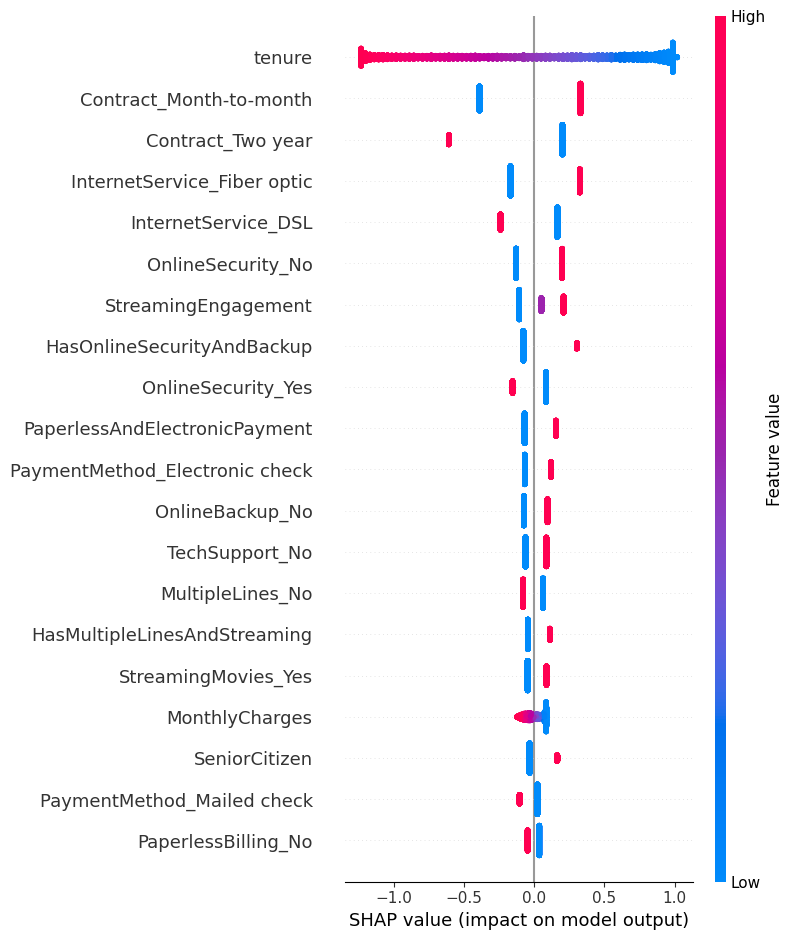

In [47]:
shap.summary_plot(shap_values_array, Telco_df_enc, feature_names = X.columns)

In [49]:
# force plot to esssentially do the same function above
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_array[0], Telco_df_enc.iloc[0], feature_names=X.columns)

In [52]:
#dependence plot to understand the features that impacted the models predictions
def dependence_plot(shap_values_array,Telco_df_enc, interaction_index = None):
  for col in Telco_df_enc.columns:
    shap.dependence_plot(col, shap_values_array, Telco_df_enc, interaction_index = None, show = False, dot_size=100)
    plt.title(f'Dependence Plot for {col}')
    plt.show()

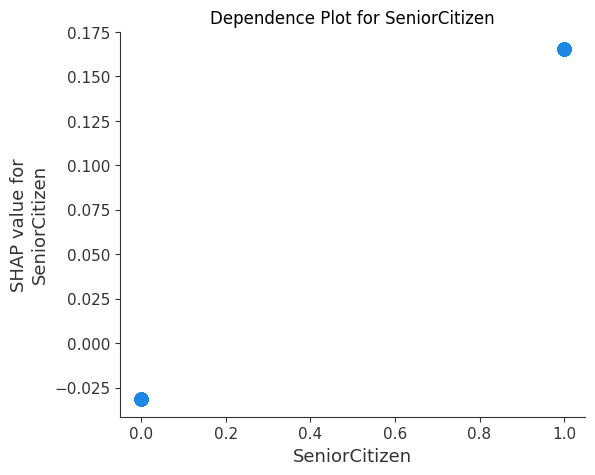

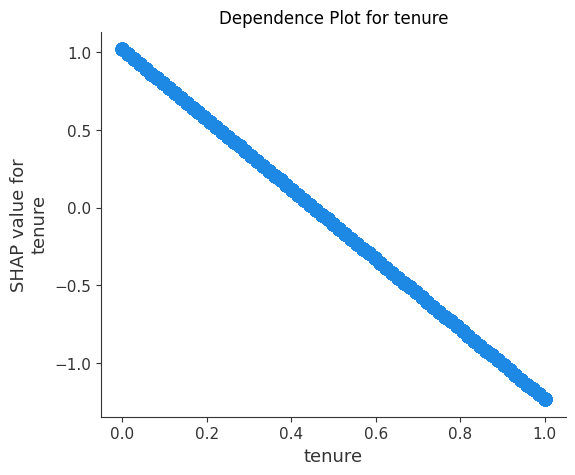

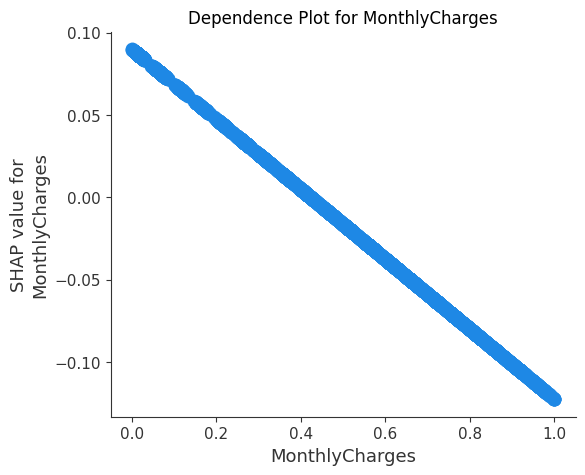

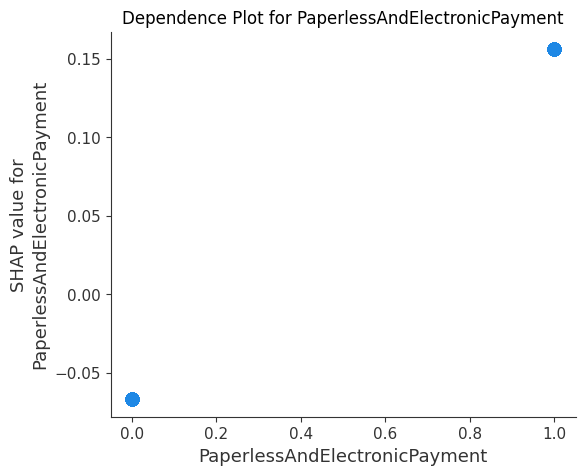

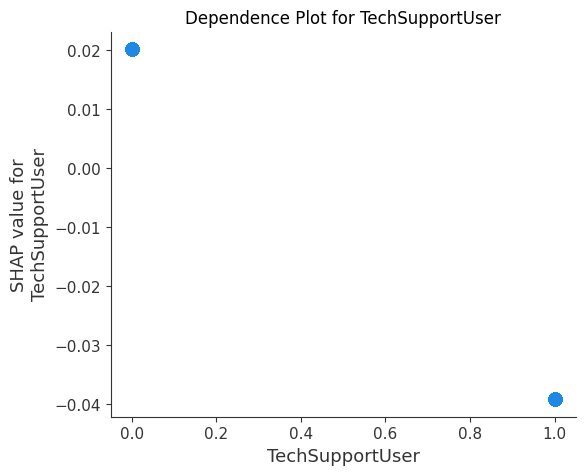

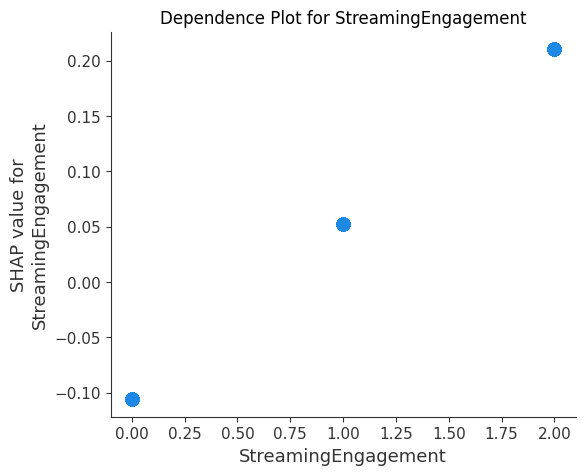

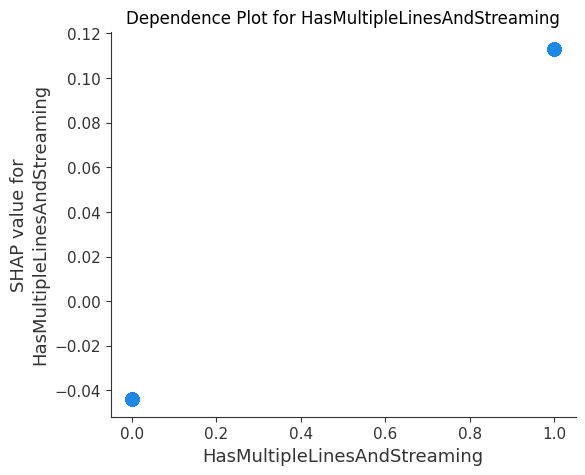

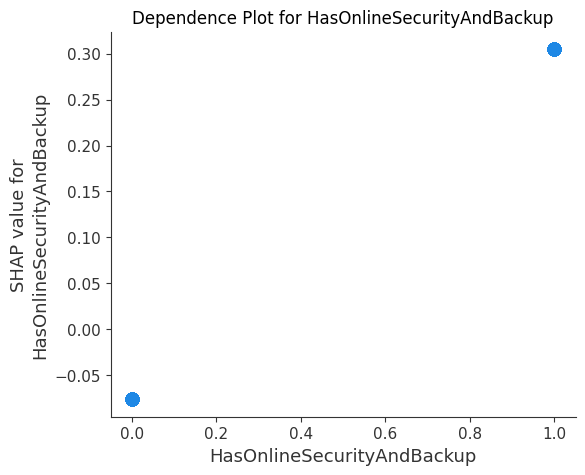

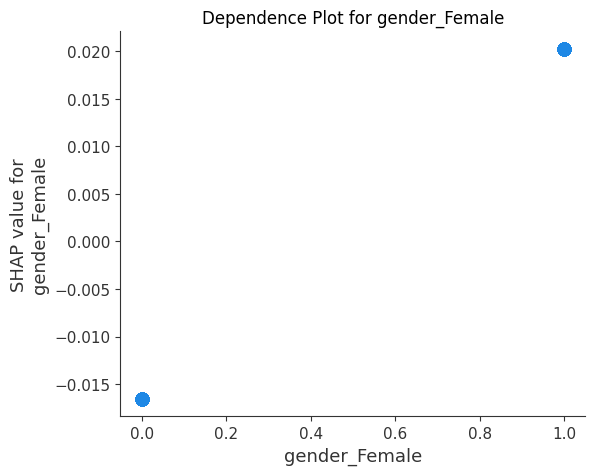

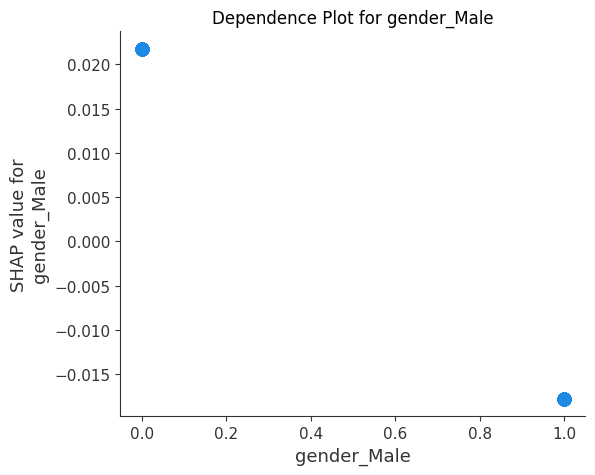

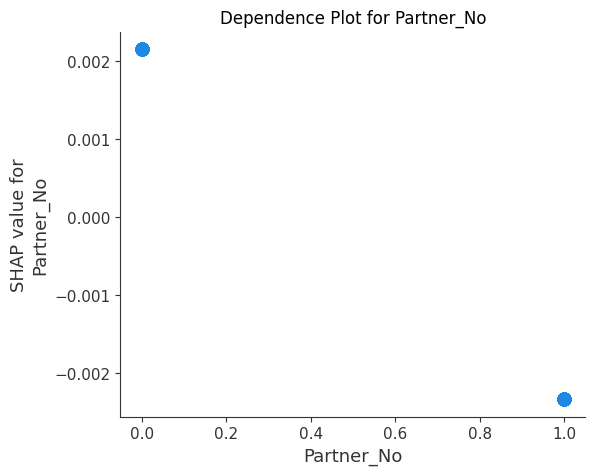

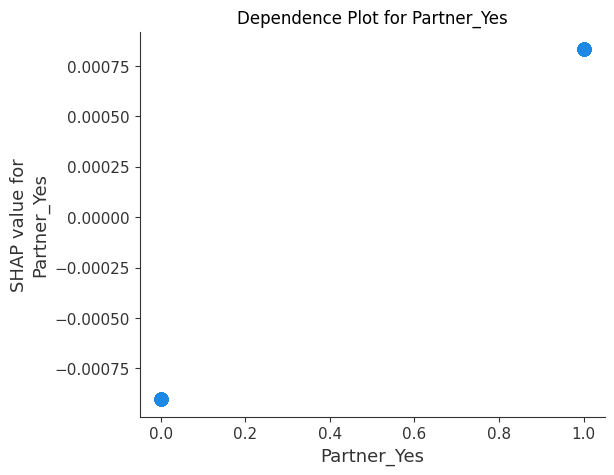

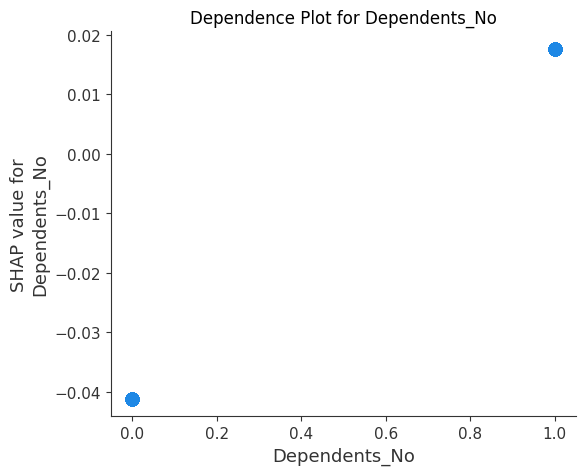

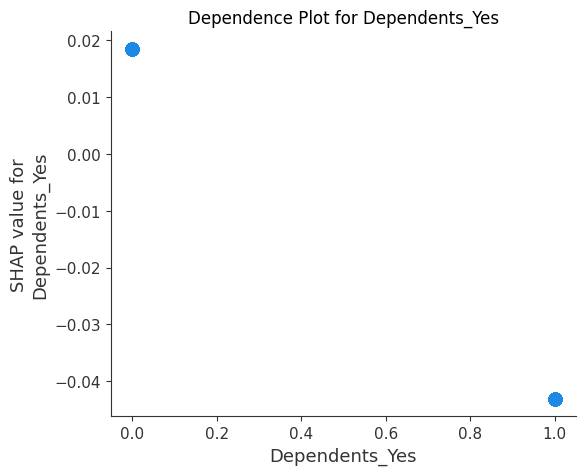

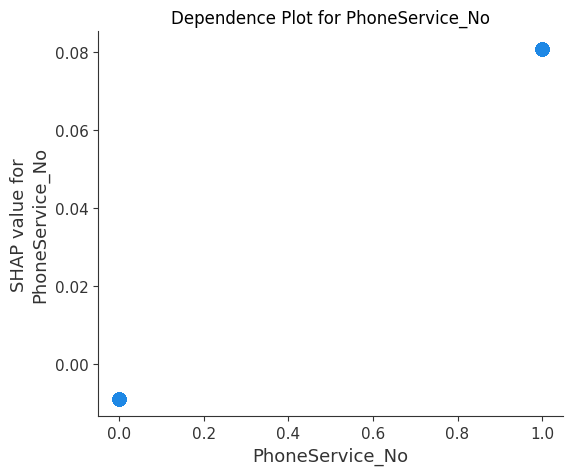

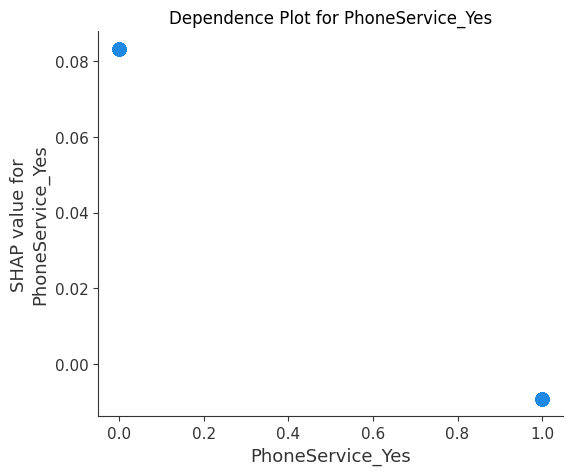

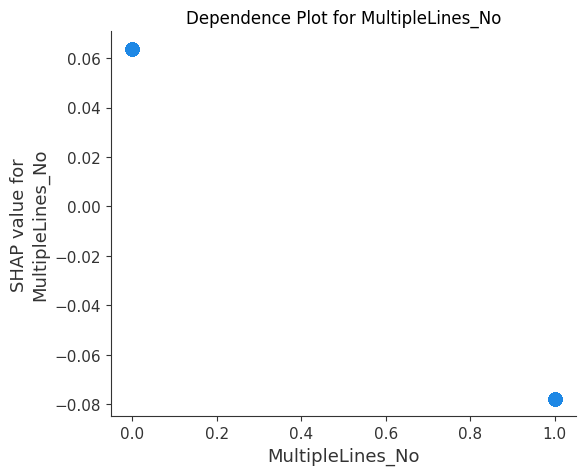

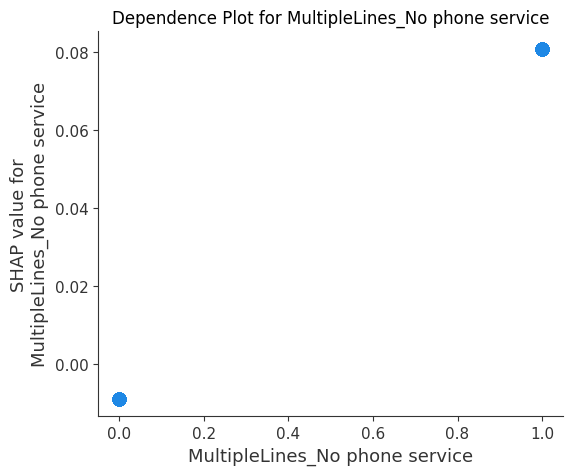

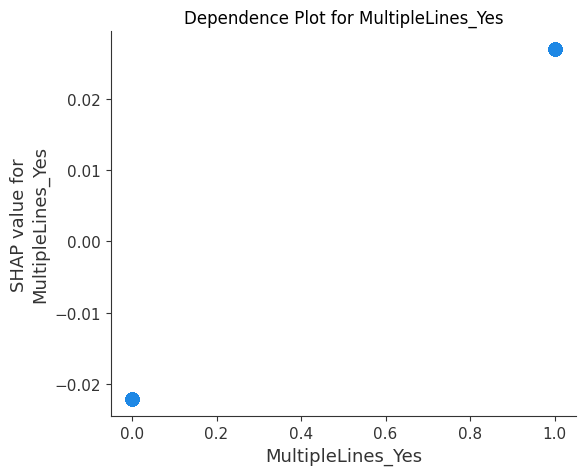

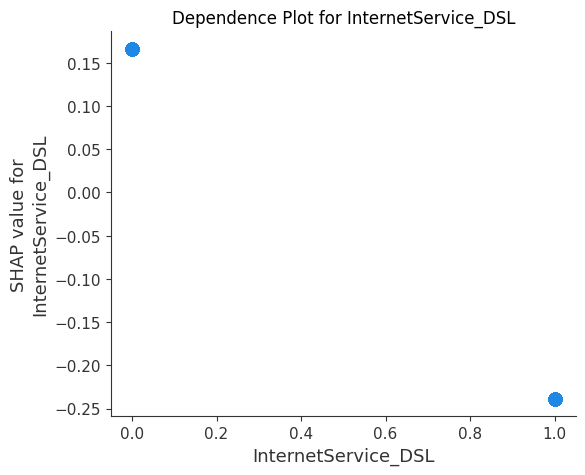

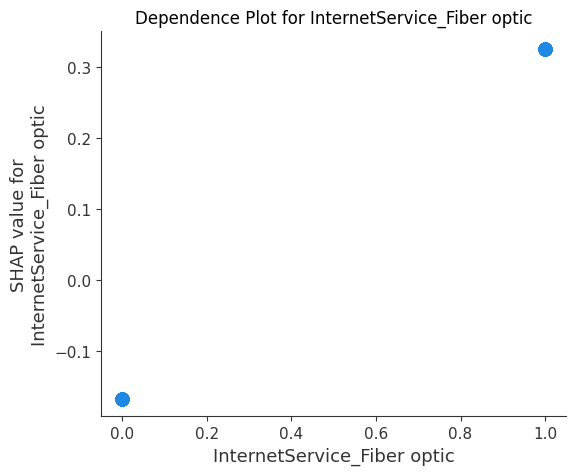

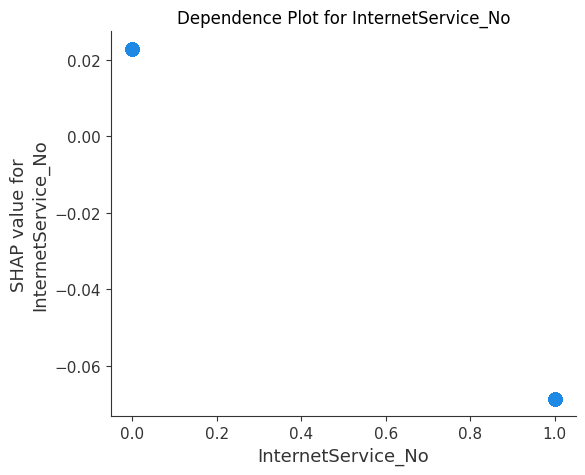

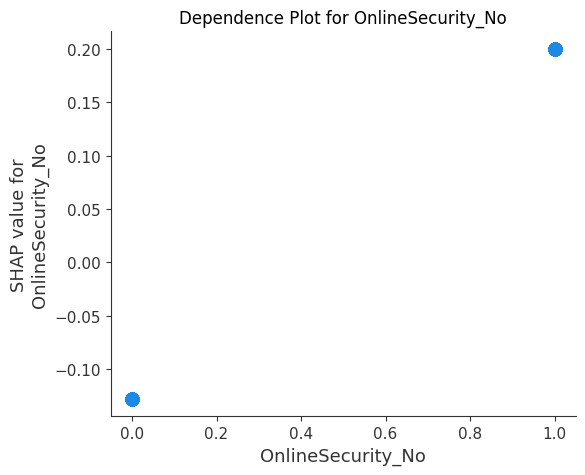

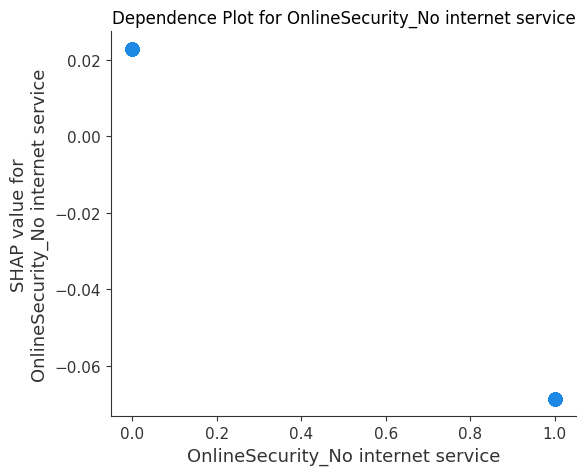

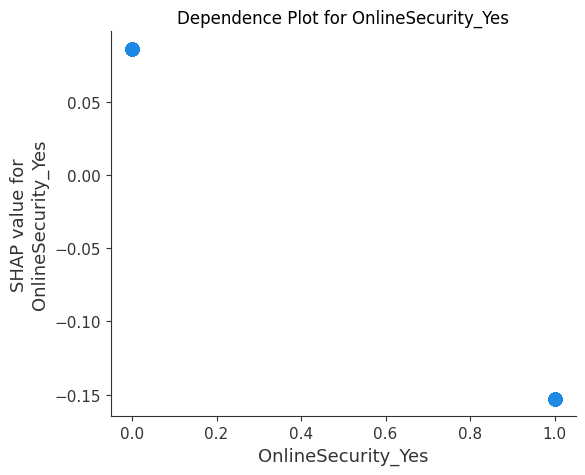

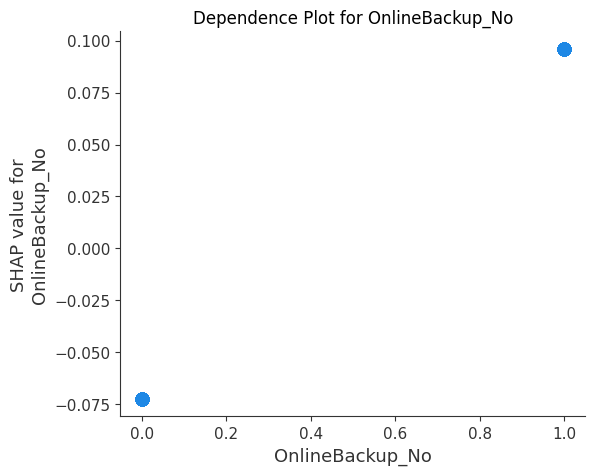

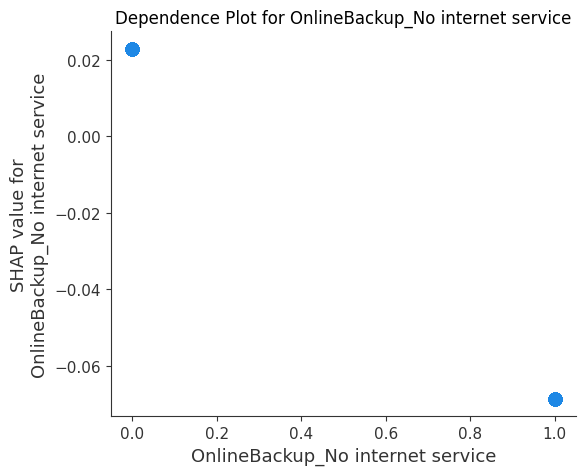

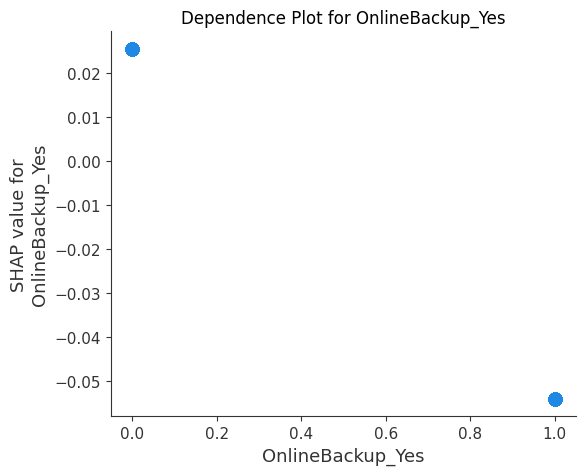

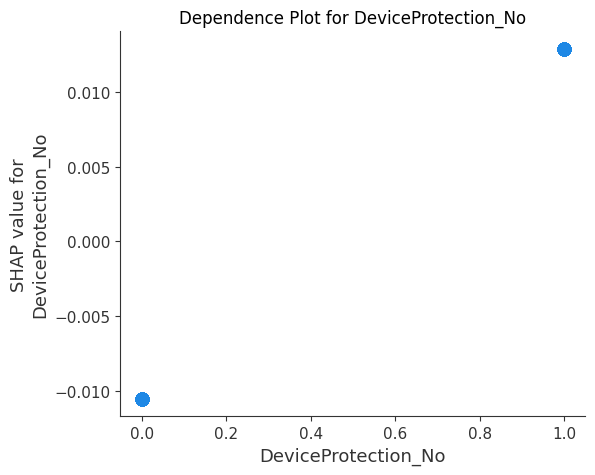

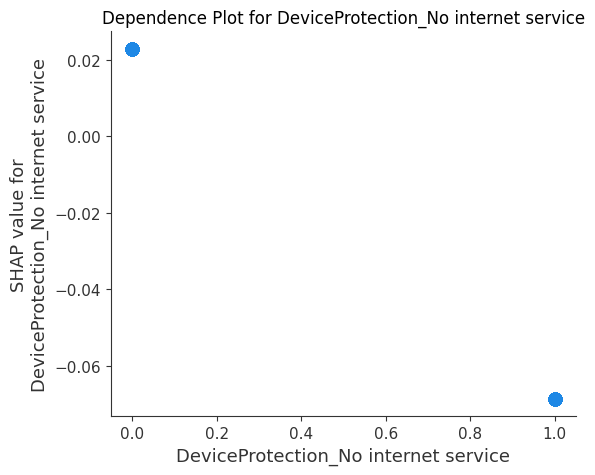

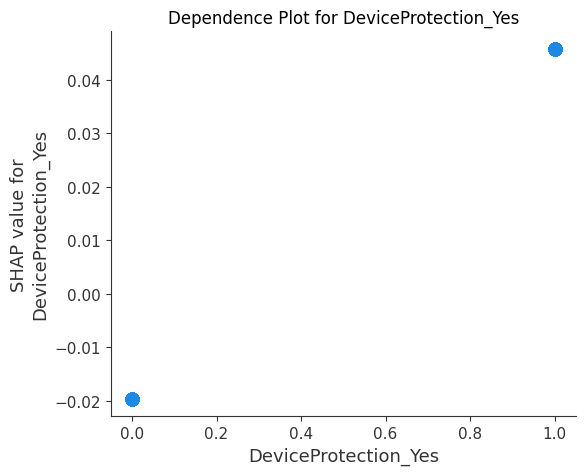

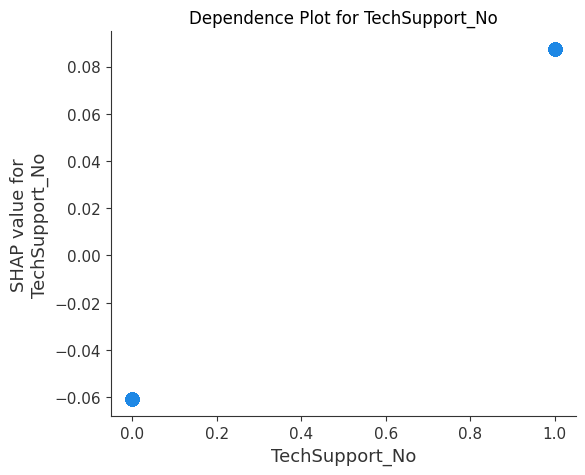

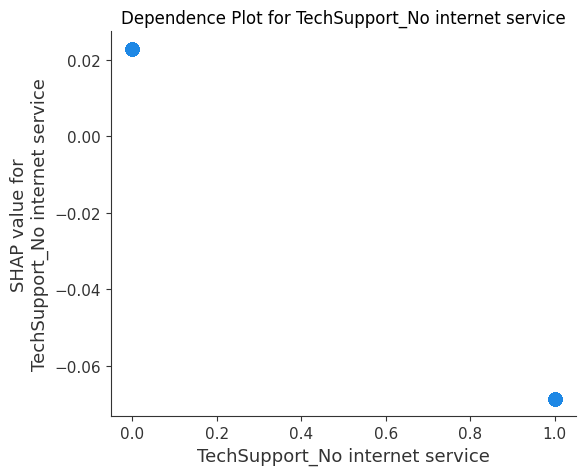

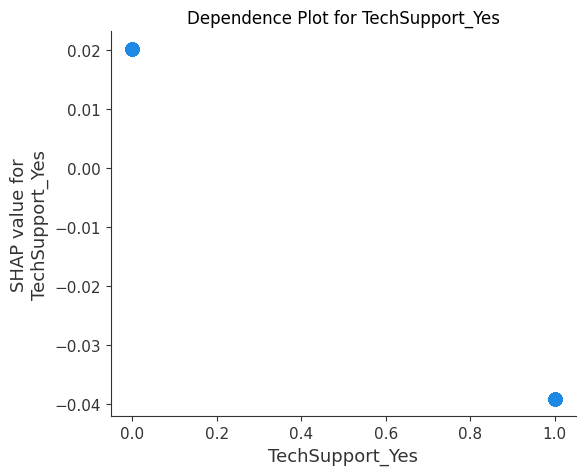

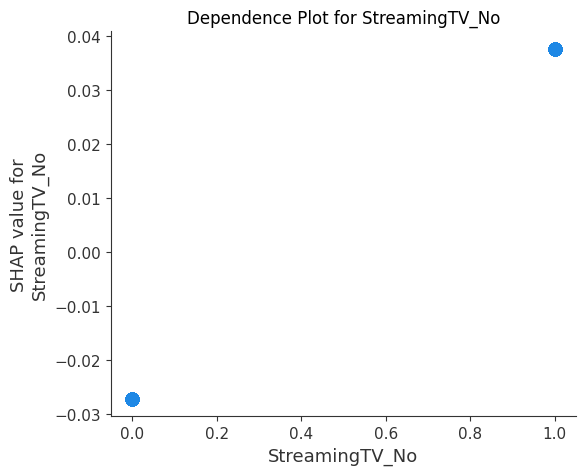

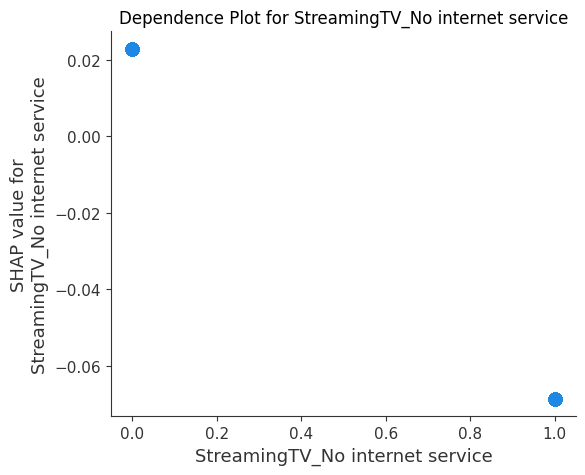

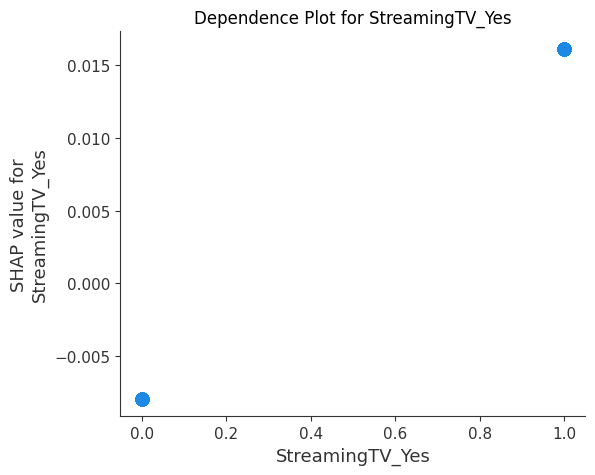

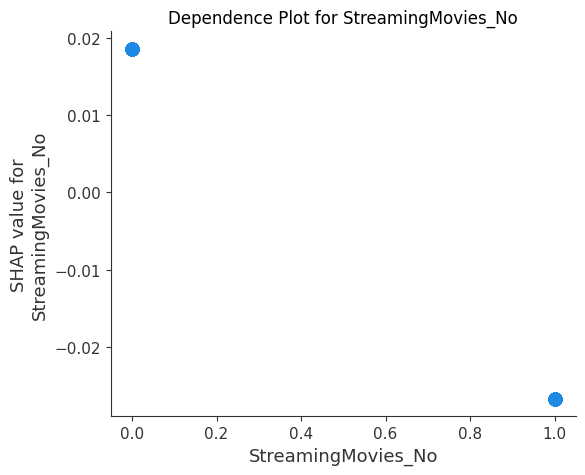

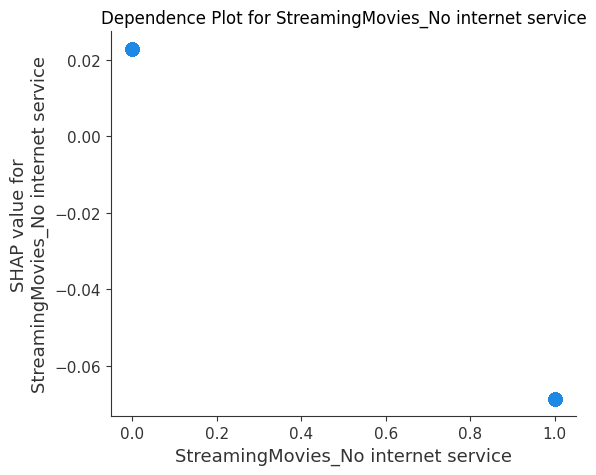

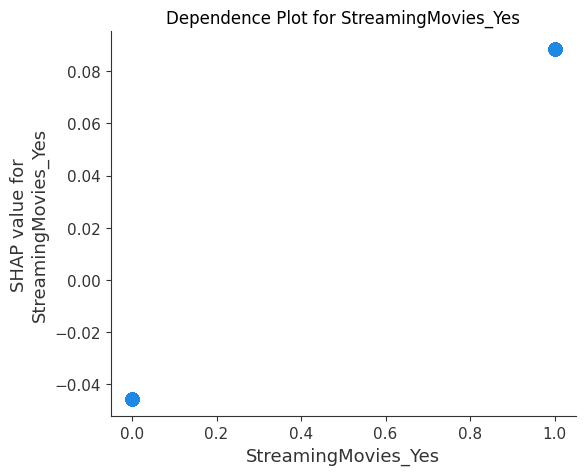

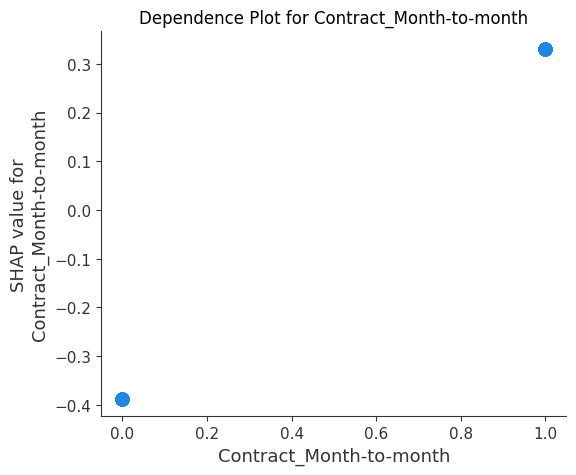

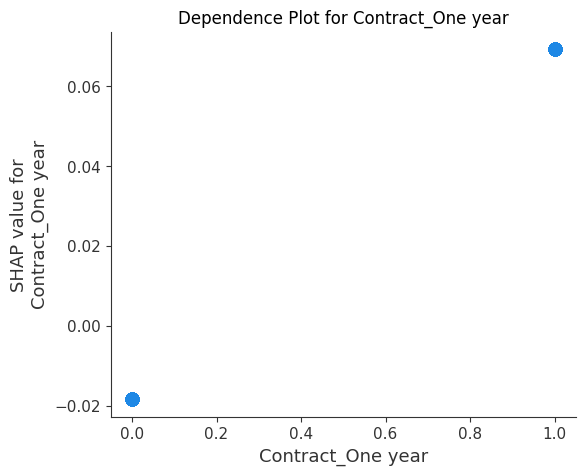

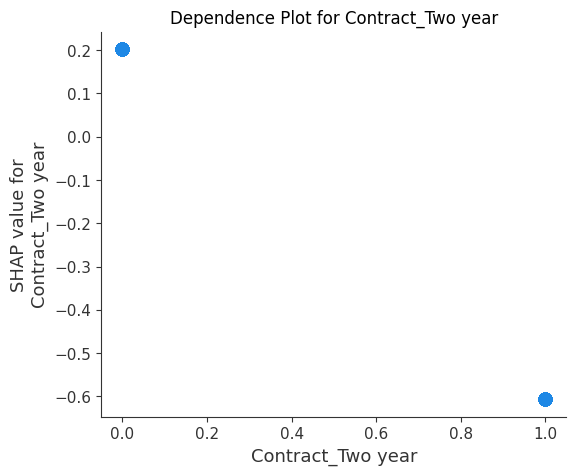

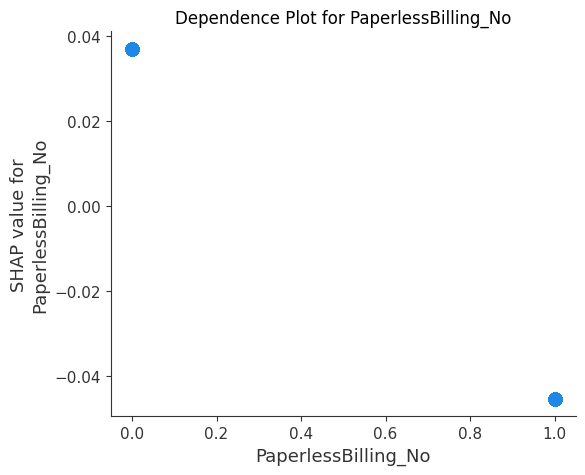

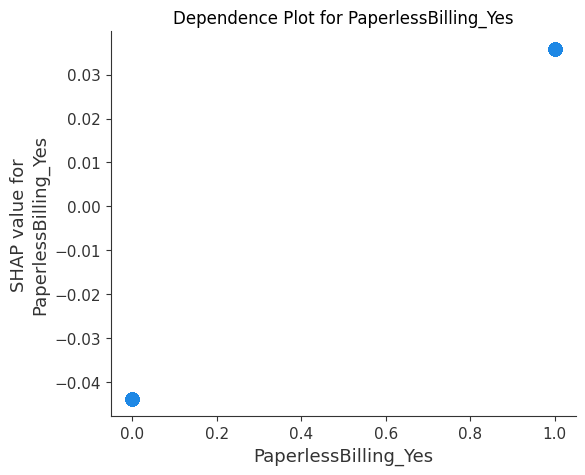

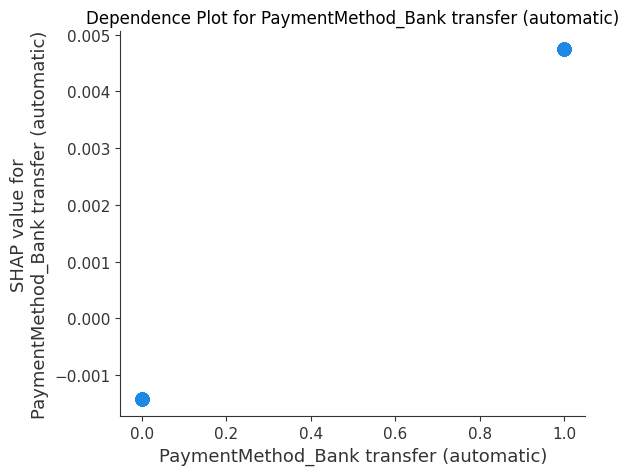

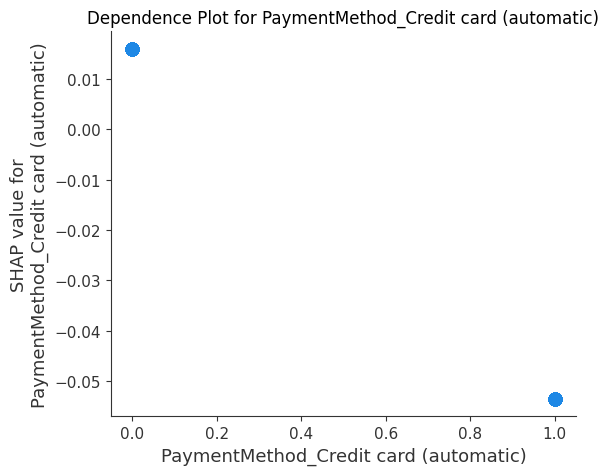

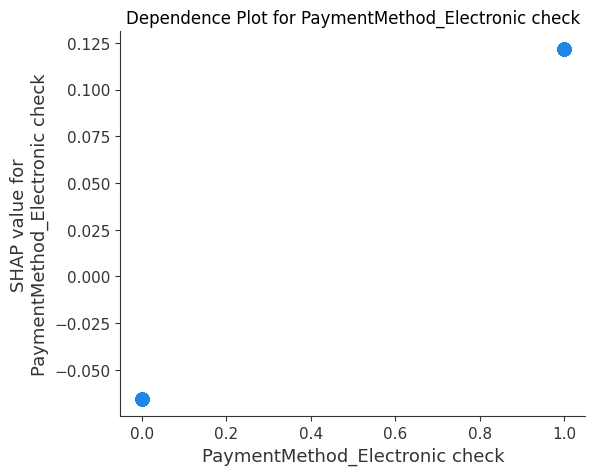

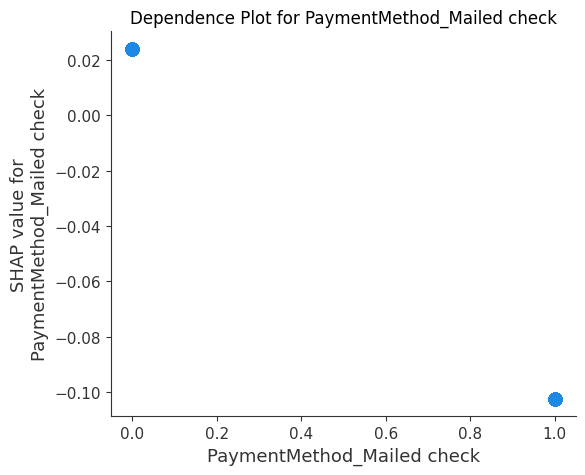

In [53]:
dependence_plot(shap_values_array, Telco_df_enc)